In [1]:
from kneed import DataGenerator, KneeLocator
from quick_extract import *
from get_data import *
from load_rhd import *
import matplotlib.pyplot as plt
from ExtractRecordings.manual.simple_sort import*
import pandas as pd
from PostProcessing.tools.utils import *
from tonotopy import *
from matplotlib.colors import ListedColormap, Normalize
from format_data import *
from skimage import measure
import matplotlib.colors as colors
from format_data import *
from utils import *
sr = 30e3
t_pre = 0.2#0.2
t_post = 0.30#0.300
bin_width = 0.02
#bin_width = 0.02
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)
max_freq = 2
min_freq=2 #3 for A1
threshold = 2 #threshold for contour detection 3.2 is good

n_jobs = -1
#path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/FRINAULT/'
#path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/MUROLS/'

path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240423_SESSION_00'
#folders = get_folders(path)
#create_data(path, bin_width)
#for i in range(1,len(folders)):
    #folder = folders[i]
    #create_data(path+folder, bin_width)
#del folders[1] # only for Frinault

folders = ['headstage_0', 'headstage_1']


In [2]:
neural = np.load('/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240423_SESSION_00/filtered_neural_data.npy')

In [3]:
len(neural)

64

 en cours de traitement
[18.         17.         16.         15.27343926 16.         17.
 18.         18.8674985  18.        ] [21.61917634 21.60968193 21.22838311 21.         20.62636771 20.22085519
 20.21310516 21.         21.61917634]
[16.         15.08743229 16.         16.73020065 16.        ] [23.22630045 23.         22.6088546  23.         23.22630045]
[19.         18.         17.57960176 18.         19.         19.16825618
 19.        ] [22.12687291 22.18364938 22.         21.84054796 21.91494526 22.
 22.12687291]
[11.         10.7421873  11.         11.11484522 11.        ] [16.08843027 16.         15.91873757 16.         16.08843027]
[19.         18.52013722 19.         19.31098026 19.        ] [4.29102944 4.         3.86573295 4.         4.29102944]
[16.         15.86096894 16.         16.04821613 16.        ] [21.02485316 21.         20.93262798 21.         21.02485316]
[18.         17.         16.44199927 17.         18.         18.04869253
 18.        ] [3.14358865 3.5857

'all izz well'

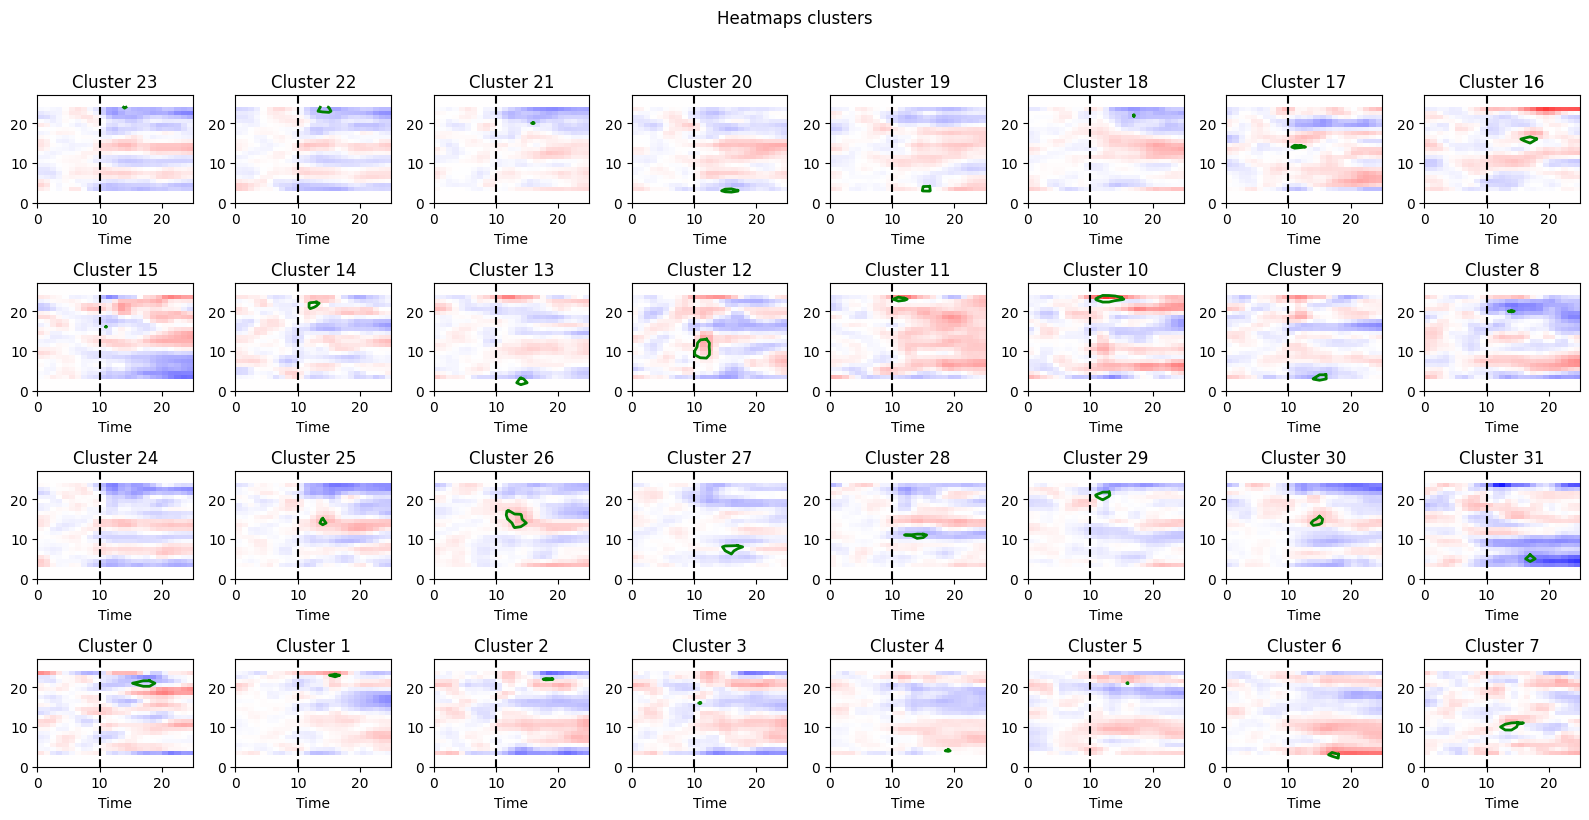

In [2]:
condition = 'playback'
print(' en cours de traitement')
    #create_data_v2(path+folder, bin_width)
data = np.load(path+'/data.npy')
features = np.load(path+'/features.npy', allow_pickle=True)
    #gc = np.load(path+folder+f'/good_clusters_playback.npy', allow_pickle=True)
gc = np.arange(32)  
unique_tones = np.load(path+'/unique_tones.npy', allow_pickle=True) 
save_name_tono = path+f'/heatmaps_{condition}.npy'
heatmaps = get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, max_freq, min_freq, condition, save_name_tono)
plot_heatmap_bandwidth(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, '', condition)

In [7]:
features

array([{'Played_frequency': 0.0, 'Block': 0.0, 'Condition': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Block': 0.0, 'Condition': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Block': 0.0, 'Condition': 0.0, 'Frequency_changes': False},
       ...,
       {'Played_frequency': 828.0, 'Block': 3.0, 'Condition': 1.0, 'Frequency_changes': False},
       {'Played_frequency': 828.0, 'Block': 3.0, 'Condition': 1.0, 'Frequency_changes': False},
       {'Played_frequency': 828.0, 'Block': 3.0, 'Condition': 1.0, 'Frequency_changes': False}],
      dtype=object)

In [9]:
m_neurone = get_mean_neurone(data, features, t_pre, t_post, bin_width, gc)

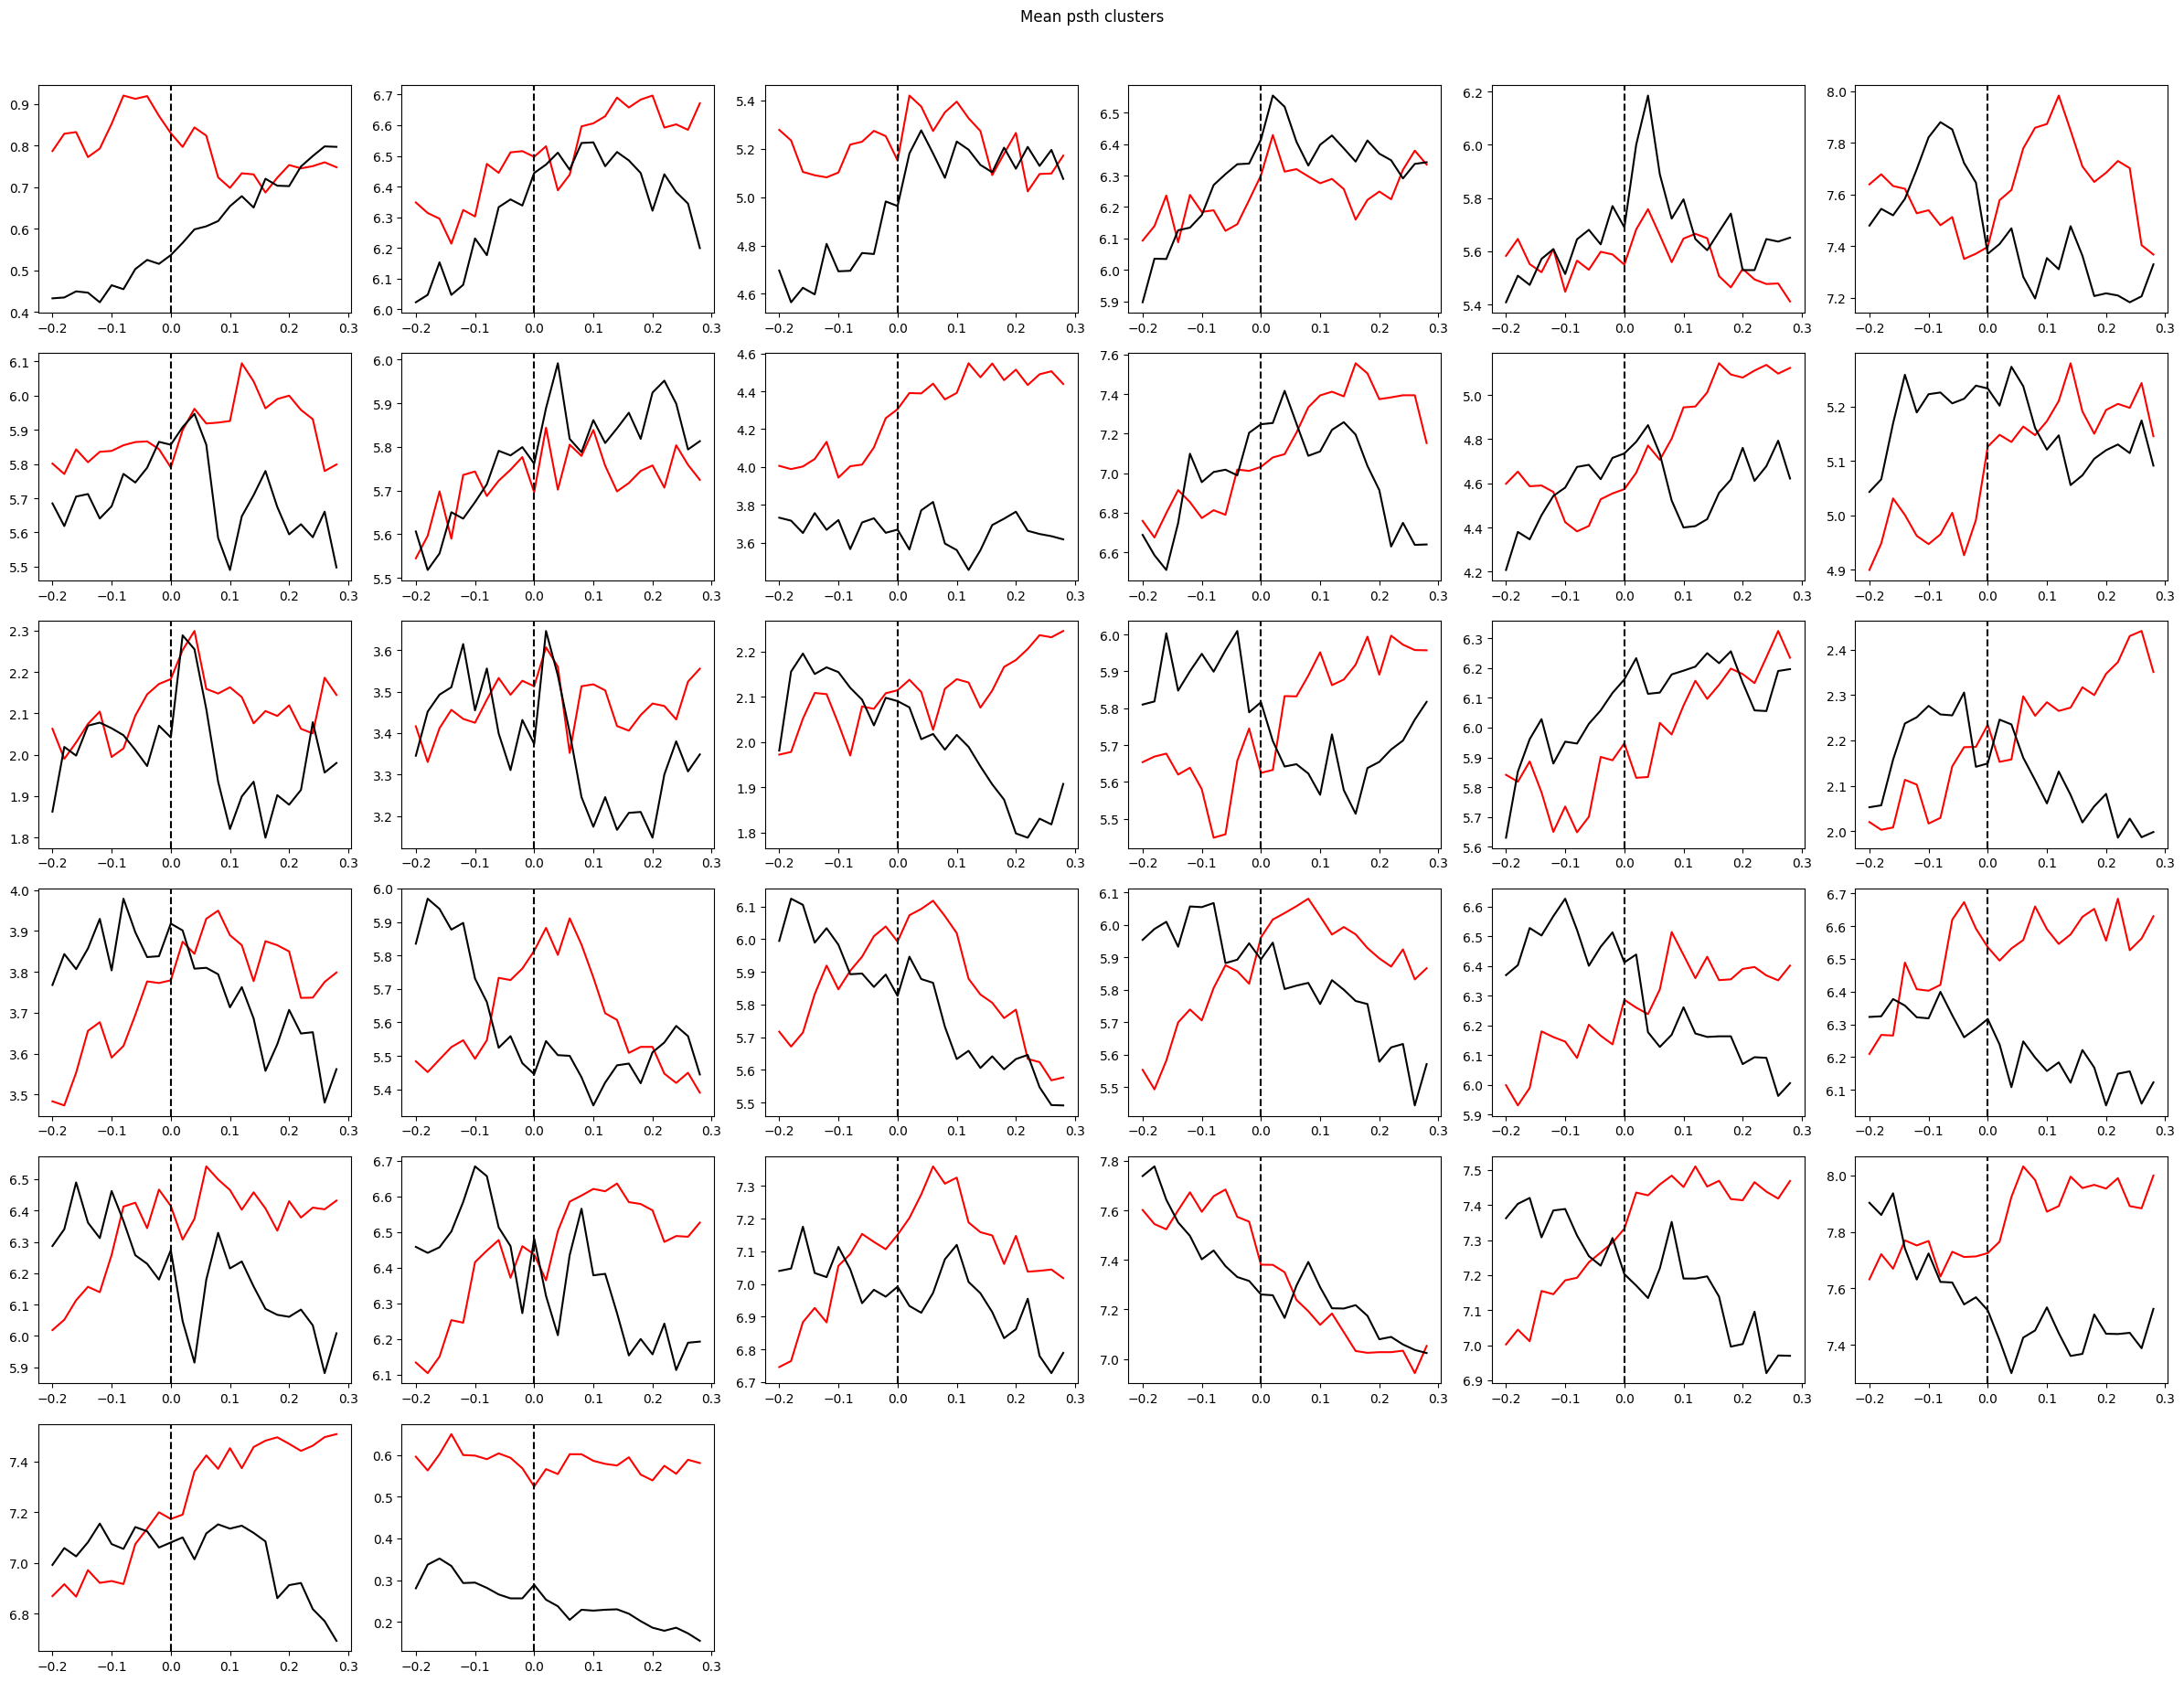

In [10]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)
    # Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('Mean psth clusters', y=1.02)
plt.subplots_adjust() 

if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()   
for cluster, ax in enumerate(axes):
    if cluster < num_plots:
     # Flatten the axis array if it's more than 1D
        ax.plot(psth_bins[:-1], m_neurone[0][cluster], c = 'red')
        ax.plot(psth_bins[:-1], m_neurone[1][cluster], c = 'black')
        ax.axvline(0, c = 'black', linestyle='--')
    
for ax in axes[num_plots:]:
    ax.axis('off')
plt.tight_layout()  

In [21]:
bd = np.load(path+f'/heatmap_bandwidth.npy')
print(bd)

[[  715.  1111.]
 [ 1287.  1727.]
 [  460.   617.]
 [ 1111.  2000.]
 [ 1111.  2684.]
 [ 1490.  2317.]
 [  460.   715.]
 [  343.   533.]
 [ 1490.  2317.]
 [ 1111.  1727.]
 [ 2000.  3601.]
 [ 6484. 10079.]
 [ 1111.  1727.]
 [  343.   460.]
 [  959.  1490.]
 [  828.  1111.]
 [  343.   533.]
 [ 5598. 10079.]
 [ 1287.  2000.]
 [  715.  1490.]
 [ 3109.  4832.]
 [ 7511. 11676.]
 [ 7511. 11676.]
 [ 7511. 10079.]
 [  343.   533.]
 [ 1287.  1727.]
 [ 1490.  2317.]
 [ 3109.  5598.]
 [ 2317.  3109.]
 [ 1287.  2000.]]


In [17]:
#plotted_heatmaps = np.load(path+folder+f'/heatmap_plot_{condition}.npy')
#plot_inout(heatmaps, bd, gc,unique_tones, min_freq, max_freq, psth_bins, path, folder, condition)


In [22]:
in_tr_psth, out_tr_psth   = get_mean_psth_in_bandwidth(data, features, bd, t_pre, t_post, bin_width, gc, 'tracking')
in_pb_psth, out_pb_psth   = get_mean_psth_in_bandwidth(data, features, bd, t_pre, t_post, bin_width, gc, 'playback')

Text(0.5, 1.0, 'tracking vs playback IN')

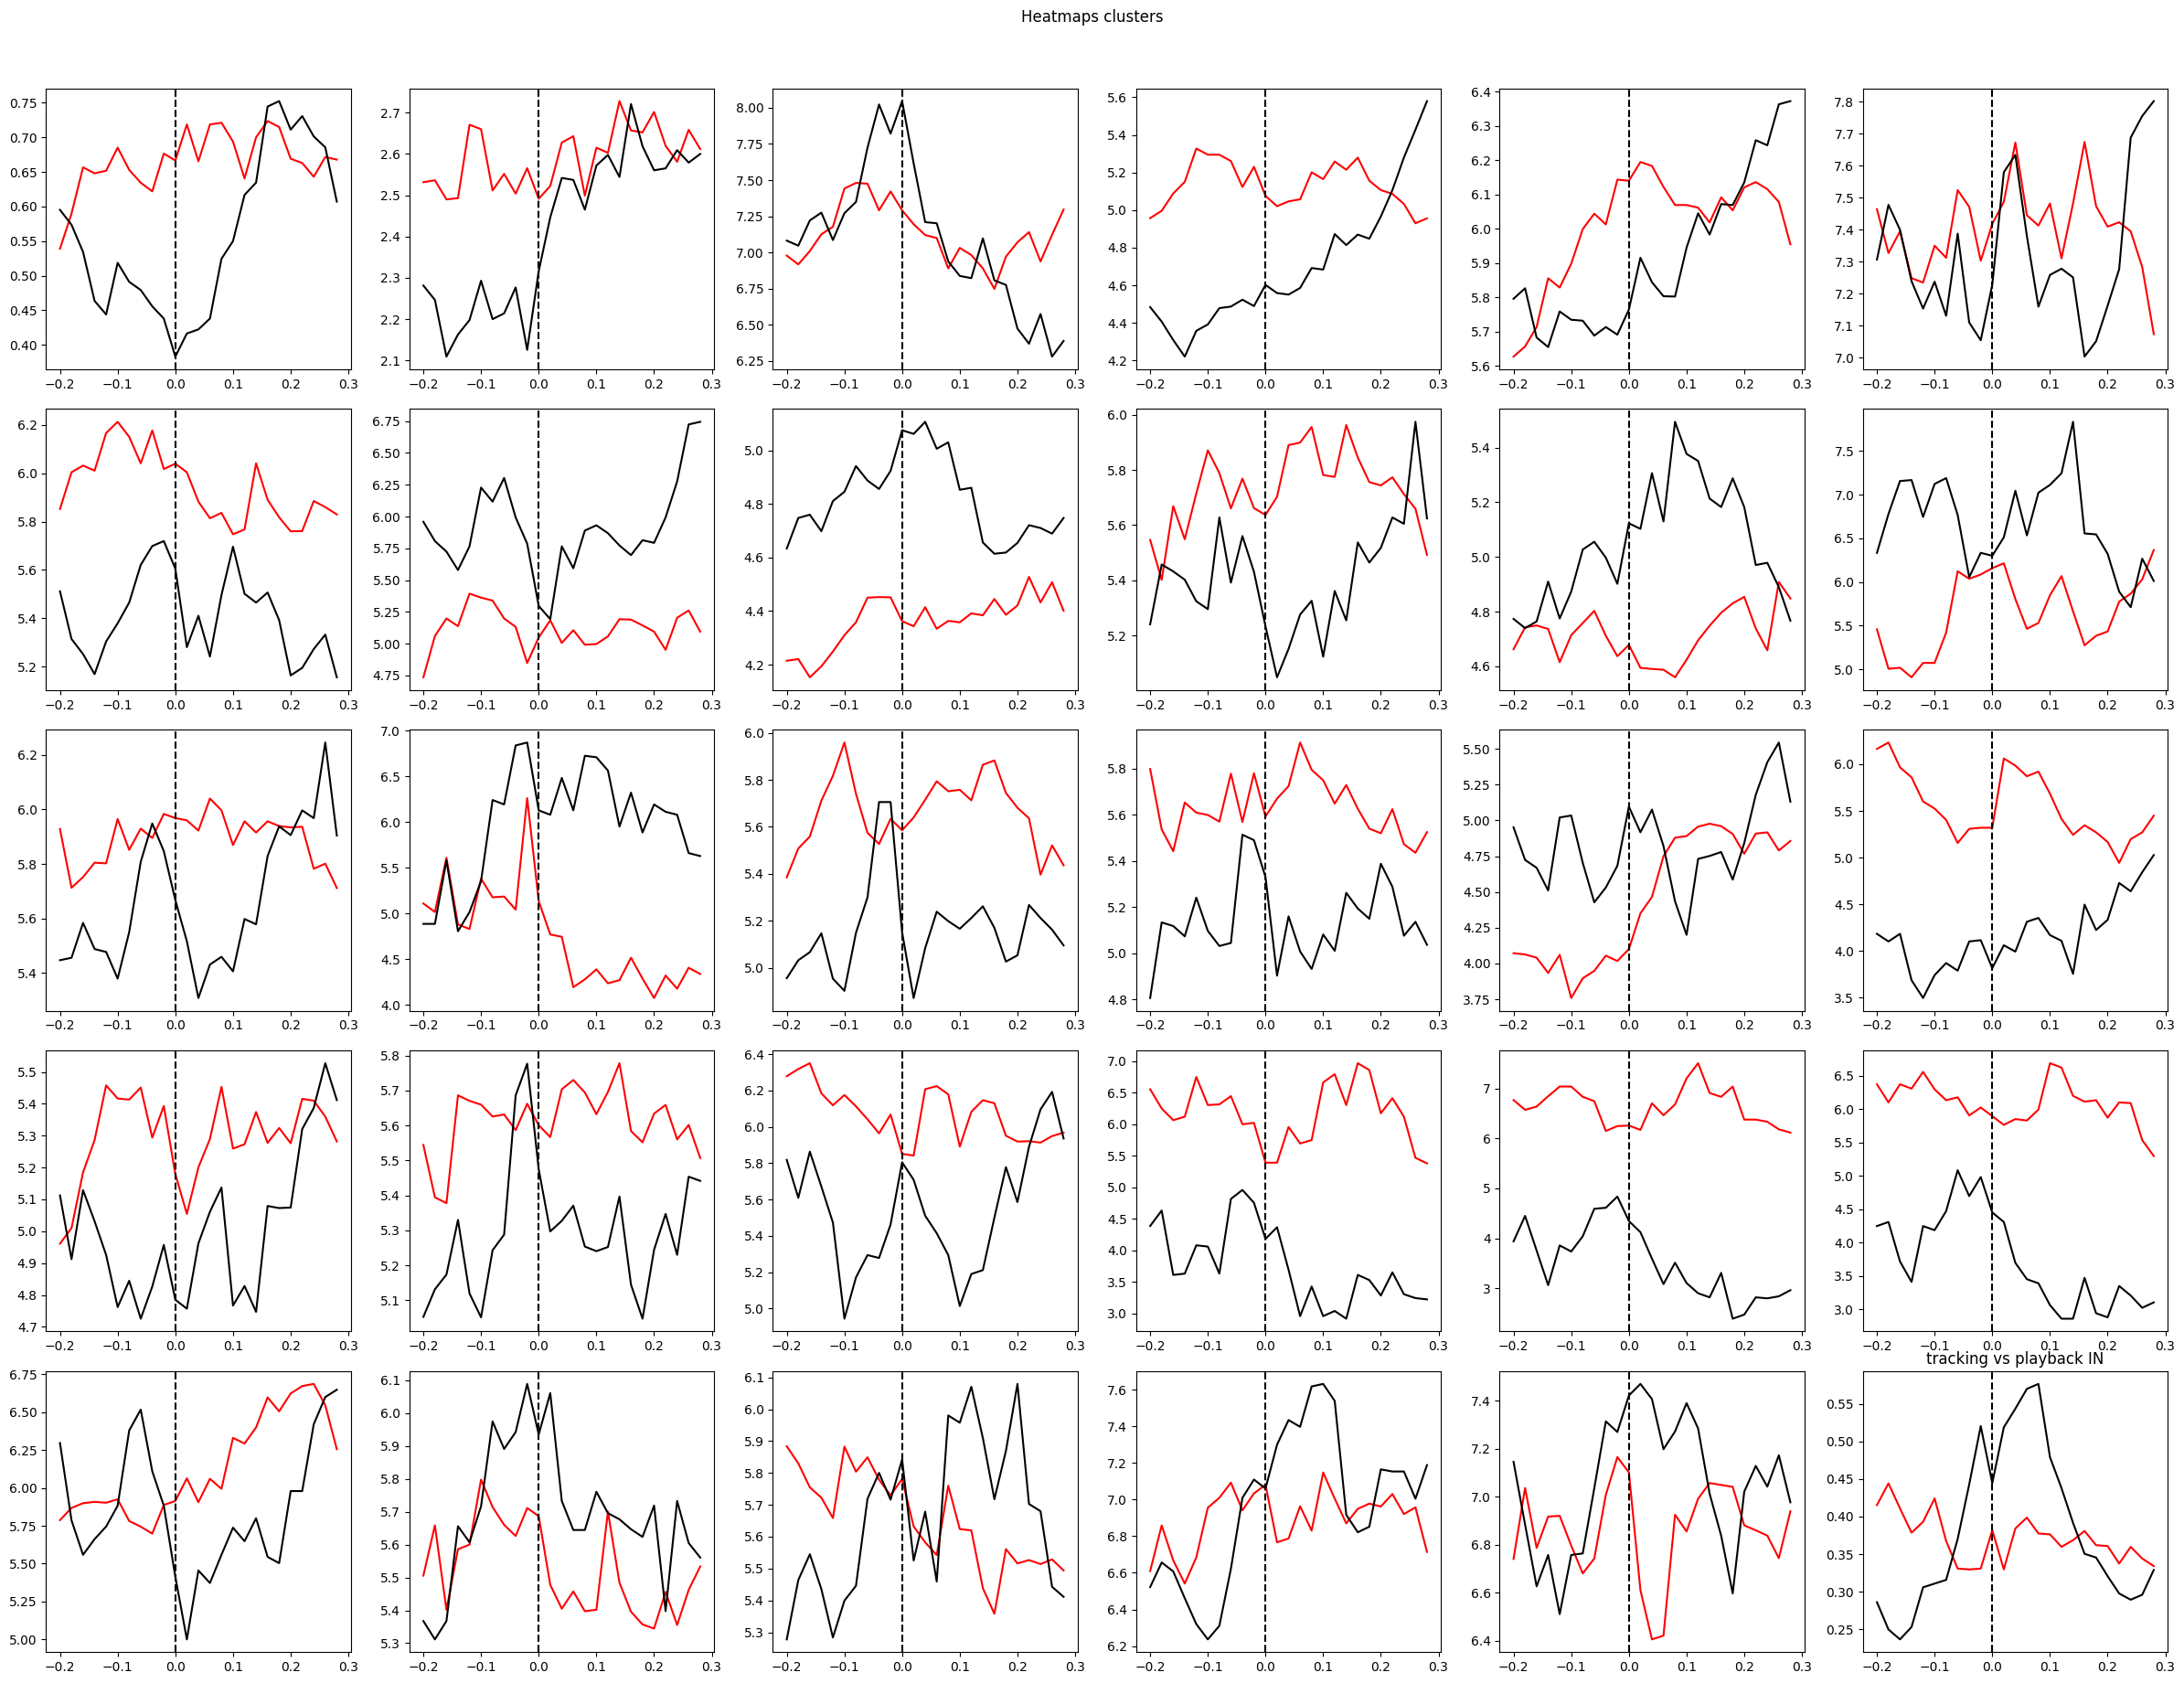

In [24]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


    # Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    #

for cluster, ax in enumerate(axes):
    if cluster < num_plots:
        ax.plot(psth_bins[:-1], in_tr_psth[cluster], c = 'red')
        ax.plot(psth_bins[:-1], in_pb_psth[cluster], c = 'black')
        ax.axvline(0, c = 'black', linestyle='--')
        
        
for ax in axes[num_plots:]:
    ax.axis('off')
plt.tight_layout()
plt.title('tracking vs playback IN')